## Decision Trees
### Consider the dataset in the following table, of houses represented by five training examples. The target attribute is 'Acceptable', which can have values 'Yes' or 'No'. This is to be predicted based on the other attributes of the house. 
#### House 	Furniture	No.rooms	New kitchen 	Acceptable
#### 1 		No 		      3 		Yes 		     Yes
#### 2 		Yes		      3 		No 		         No
#### 3 		No 		      4 		No 		         Yes
#### 4		No 		      3 		No 		         No
#### 5	    Yes 	      4 		No 		         Yes
### Compute the entropy of the target attribute
##### i.	Construct a decision tree from the above examples, that would be learned by the ID3 algorithm.
##### ii.	Show the value of information gain for each candidate attribute at each step in the construction of the tree.


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = {
    'House Furniture': ['No', 'Yes', 'No', 'No', 'Yes'],
    'No. of Rooms': [3, 3, 4, 3, 4],
    'New Kitchen': ['Yes', 'No', 'Yes', 'No', 'No'],
    'Acceptable': ['Yes', 'No', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)

In [3]:
df['House Furniture'] = df['House Furniture'].map({'No': 0, 'Yes': 1})
df['New Kitchen'] = df['New Kitchen'].map({'No': 0, 'Yes': 1})
df['Acceptable'] = df['Acceptable'].map({'No': 0, 'Yes': 1})


In [4]:
X = df.drop('Acceptable', axis=1)
y = df['Acceptable']

In [5]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

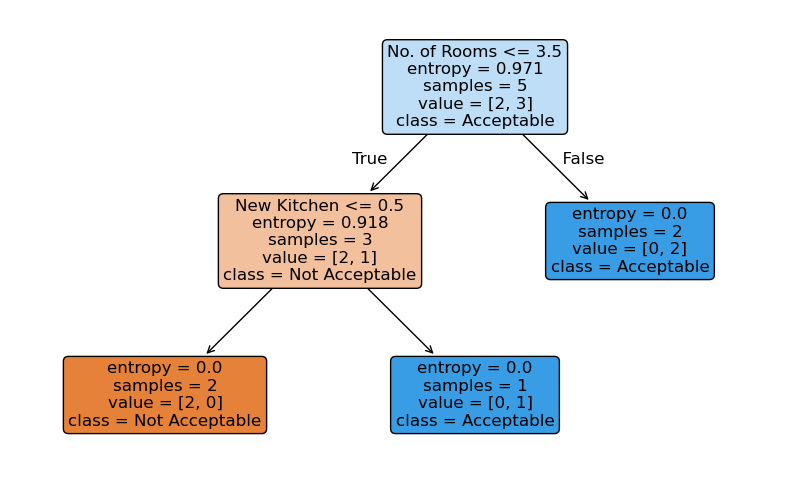

In [6]:
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Not Acceptable', 'Acceptable'], filled=True, rounded=True, fontsize=12)
plt.show()

In [7]:
def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10)) # Small epsilon to avoid log(0)
    return entropy

entropy = calculate_entropy(y)
print("Entropy of the target (Acceptable):", entropy)

Entropy of the target (Acceptable): 0.9709505941661296


In [9]:
def calculate_information_gain(X, y, feature):
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)
    parent_entropy = calculate_entropy(y_train)  # entropy before split
    child_entropy = model.tree_.impurity[0]  # impurity after split (root node)
    information_gain = parent_entropy - child_entropy  # difference gives information gain
    return information_gain